# RWN Experiments

**Author:** Noah Perry

**Overview:** This notebook contains empirical experiments illustrating the performance of RWN using the `bodyfat` dataset from the `mfp` R package

**Data description:** The `bodyfat` data contains body measurements of 252 adult males and two estimates of their body fat percentage calculated using the Brozek and Siri equations. 

Link to documentation for `mfp`: https://cran.r-project.org/web/packages/mfp/mfp.pdf

**Method:** RWN is a statistical disclosure control (SDC) method created by Norm Matloff and refined in collaboration with Noah Perry

arXiv preprint: https://arxiv.org/abs/2210.06687 (publication in progress)

**Perturbed data and RWN tuning parameters:** To illustrate how RWN works, we create numerous perturbed datasets using different combinations of RWN's tuning parameters ($\epsilon$, $k$, $q$).
- $\epsilon$ (eps) is varied from 0 to 1.2 in steps of 0.05
- $k=5$ and $q=1$ for all perturbed datasets
- For each combination of tuning parameters, one perturbed dataset in created.

**Experiments:**
- Neighborhood and tuning parameter visualization
    - Plots of original distance to closest record vs. neighborhood size
- Principal component analysis
    - Proportion of variance plots
- Pearson correlation
    - Colored correlation matrix
- Outlier: Obese man with BMI of 48.9
    - Cook's distance plots
    - PCA plots
- Inlier: 81 year old man whose body dimensions are typical

### Setup

In [1]:
# Package installation (uncomment line below when running notebook for first time)
#install.packages("corrplot")
#install.packages("gtools")
#install.packages("mfp")
#install.packages("pdist")
#install.packages("regtools")

In [2]:
rm(list = ls())

# Packages
library(corrplot)
library(gtools)
library(regtools)
    # mfp package is loaded in import and clean program
    # pdist package is loaded in RWN.R code

# Filepath
fp <- # [UPDATE WITH FILEPATH TO MAIN RWN REPO]

# RWN code
source(paste0(fp,"R/RWN.R"))

# Set seed for reproducibility
set.seed(58681866)

# Define e() function
e <- function(x) {
  eval(parse(text = x))
}

corrplot 0.92 loaded

Loading required package: FNN






*********************



Latest version of regtools at GitHub.com/matloff


Type ?regtools to see function list by category







### Import and Clean Data

In [3]:
# Run import and clean program
source(paste0(fp, "Experiments/NP/01 Import and Clean bodyfat Data (mfp).R"))

Loading required package: survival



In [4]:
str(bf_clean)

'data.frame':	241 obs. of  14 variables:
 $ bodyfat_pct: num  12.3 6.1 25.3 10.4 28.7 20.9 19.2 12.4 4.1 11.7 ...
 $ age        : int  23 22 22 26 24 24 26 25 25 23 ...
 $ weight     : num  154 173 154 185 184 ...
 $ height     : num  67.8 72.2 66.2 72.2 71.2 ...
 $ neck       : num  36.2 38.5 34 37.4 34.4 39 36.4 37.8 38.1 42.1 ...
 $ chest      : num  93.1 93.6 95.8 101.8 97.3 ...
 $ abdomen    : num  85.2 83 87.9 86.4 100 94.4 90.7 88.5 82.5 88.6 ...
 $ hip        : num  94.5 98.7 99.2 101.2 101.9 ...
 $ thigh      : num  59 58.7 59.6 60.1 63.2 66 58.4 60 62.9 63.1 ...
 $ knee       : num  37.3 37.3 38.9 37.3 42.2 42 38.3 39.4 38.3 41.7 ...
 $ ankle      : num  21.9 23.4 24 22.8 24 25.6 22.9 23.2 23.8 25 ...
 $ biceps     : num  32 30.5 28.8 32.4 32.2 35.7 31.9 30.5 35.9 35.6 ...
 $ forearm    : num  27.4 28.9 25.2 29.4 27.7 30.6 27.8 29 31.1 30 ...
 $ wrist      : num  17.1 18.2 16.6 18.2 17.7 18.8 17.7 18.8 18.2 19.2 ...


### Make Perturbed Datasets with RWN

In [5]:
eps_vec_full <- seq(0, 1.2, 0.05)
for(i in 1:length(eps_vec_full)){
   assign(paste0("bf_pert_eps", eps_vec_full[i], "_k5"), rwn1(bf_clean, eps = eps_vec_full[i], k = 5, q = 1))
}

### Neighborhood and Tuning Parameter Visualization
RWN neighborhood are formed by calculating, for each record in the data, the distance to all other records in the data. In the plots belows, we illustrate how the tuning parameters $\epsilon$ (eps) and $k$ determine how neighborhoods are formed.

The original distance to closest record (DCR) is the Euclidean distance to the closest record in the unperturbed data (excluding itself) calculated for a given record.

The neighborhood size is the number of records within the neighborhood formed for a given record.

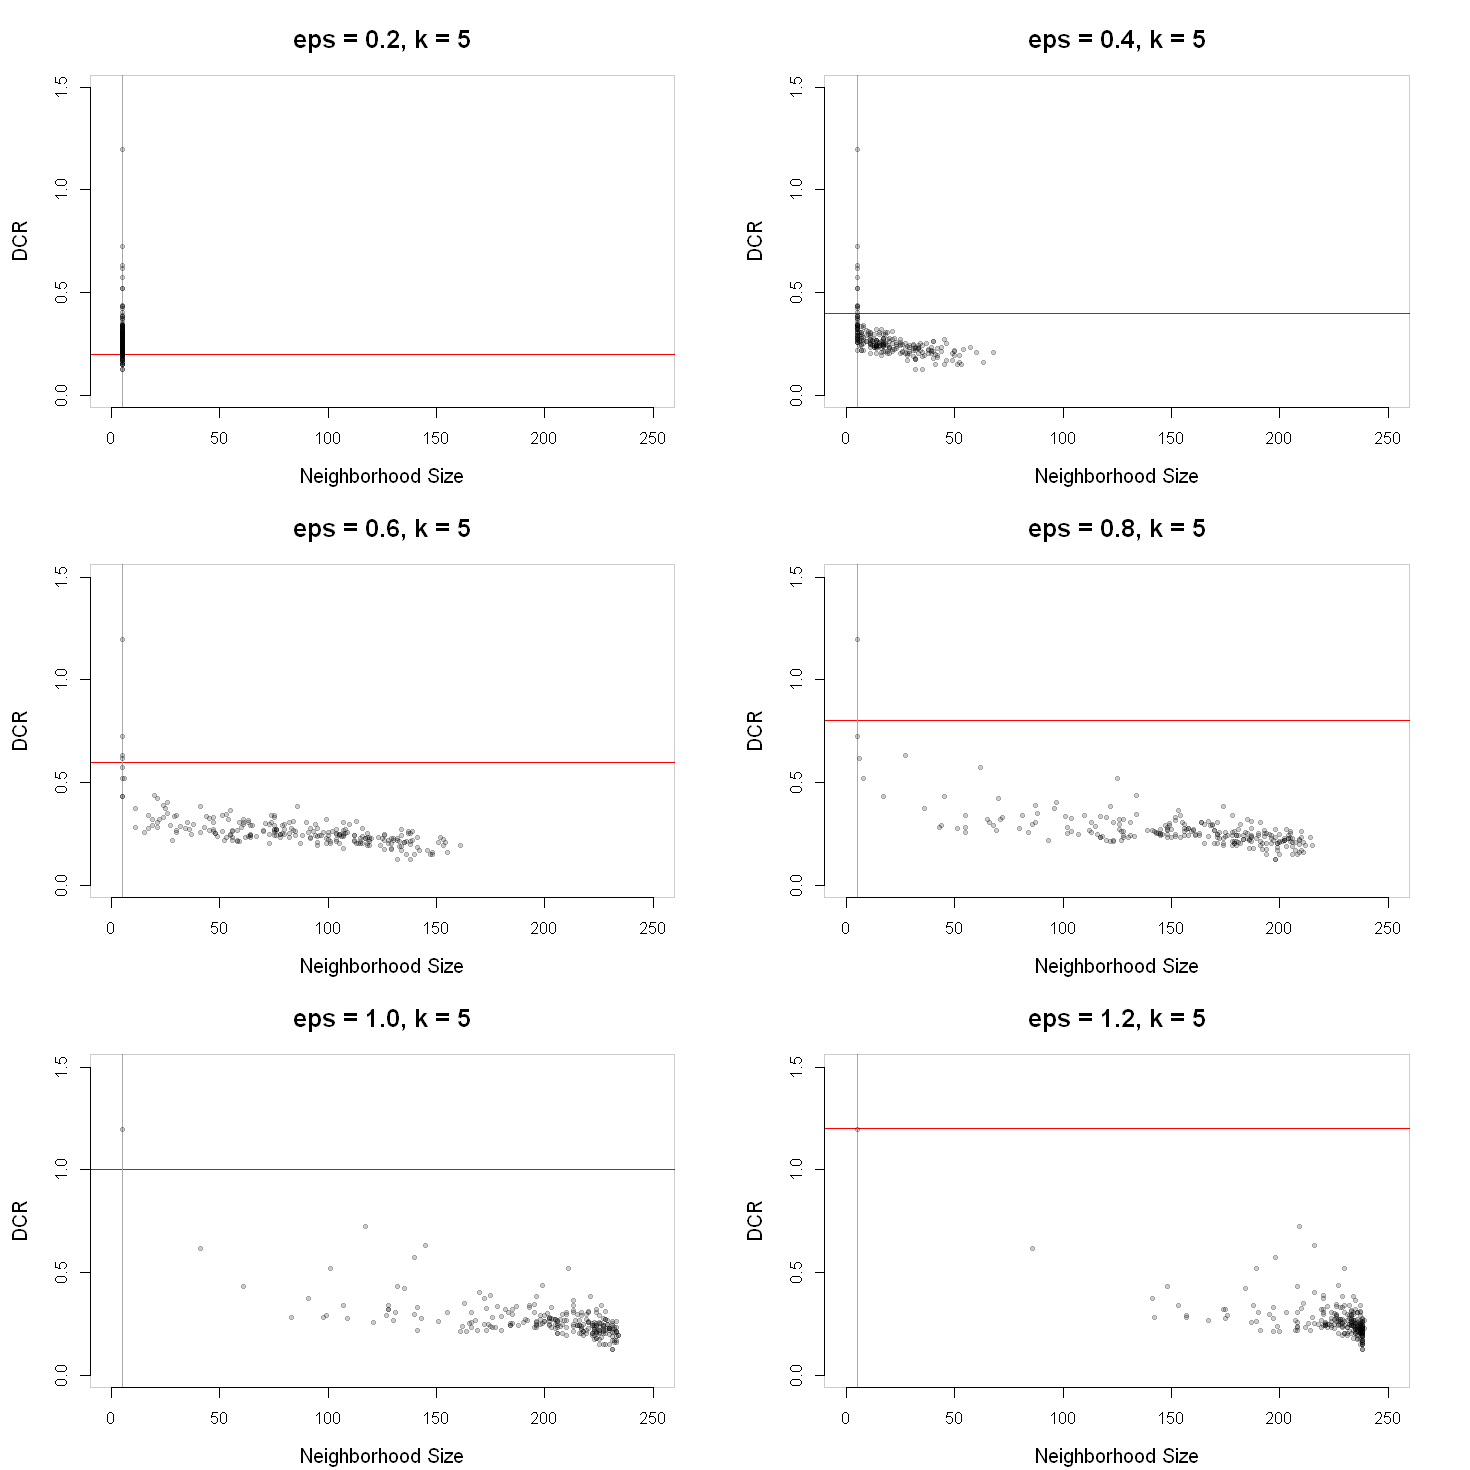

In [6]:
# Original Distance to Closest Record vs Neighborhood Size Charts
par(mfrow = c(3,2), pch = 20, col = rgb(red = 0, green = 0, blue = 0, alpha = 0.2), mai = c(0.55, 0.6, 0.5, 0.4))
options(repr.plot.width=9.8, repr.plot.height=9.8, repr.plot.res = 150)

plot(bf_pert_eps0.2_k5$nNhbrs, bf_pert_eps0.2_k5$origMinDists, 
     panel.first = c(abline(0.2, 0, col = 'red'), abline(v = 5, col = 'darkgray')),
     xlim = c(0, 250), ylim = c(0, 1.5), 
     xlab = 'Neighborhood Size', ylab = 'DCR', cex.lab = 1.2)
title(main = 'eps = 0.2, k = 5', cex.main = 1.5)

plot(bf_pert_eps0.4_k5$nNhbrs, bf_pert_eps0.4_k5$origMinDists, 
     panel.first = c(abline(0.4, 0, col = 'red'), abline(v = 5, col = 'darkgray')),
     xlim = c(0, 250), ylim = c(0, 1.5), 
     xlab = 'Neighborhood Size', ylab = 'DCR', cex.lab = 1.2)
title(main = 'eps = 0.4, k = 5', cex.main = 1.5)


plot(bf_pert_eps0.6_k5$nNhbrs, bf_pert_eps0.6_k5$origMinDists, 
     panel.first = c(abline(0.6, 0, col = 'red'), abline(v = 5, col = 'darkgray')), 
     xlim = c(0, 250), ylim = c(0, 1.5), 
     xlab = 'Neighborhood Size', ylab = 'DCR', cex.lab = 1.2)
title(main = 'eps = 0.6, k = 5', cex.main = 1.5)

plot(bf_pert_eps0.8_k5$nNhbrs, bf_pert_eps0.8_k5$origMinDists, 
     panel.first = c(abline(0.8, 0, col = 'red'), abline(v = 5, col = 'darkgray')), 
     xlim = c(0, 250), ylim = c(0, 1.5), 
     xlab = 'Neighborhood Size', ylab = 'DCR', cex.lab = 1.2)
title(main = 'eps = 0.8, k = 5', cex.main = 1.5)


plot(bf_pert_eps1_k5$nNhbrs, bf_pert_eps1_k5$origMinDists, 
     panel.first = c(abline(1, 0, col = 'red'), abline(v = 5, col = 'darkgray')),
     xlim = c(0, 250), ylim = c(0, 1.5), 
     xlab = 'Neighborhood Size', ylab = 'DCR', cex.lab = 1.2)
title(main = 'eps = 1.0, k = 5', cex.main = 1.5)

plot(bf_pert_eps1.2_k5$nNhbrs, bf_pert_eps1.2_k5$origMinDists, 
     panel.first = c(abline(1.2, 0, col = 'red'), abline(v = 5, col = 'darkgray')),
     xlim = c(0, 250), ylim = c(0, 1.5), 
     xlab = 'Neighborhood Size', ylab = 'DCR', cex.lab = 1.2)
title(main = 'eps = 1.2, k = 5', cex.main = 1.5)

### Pearson Correlation Matrices

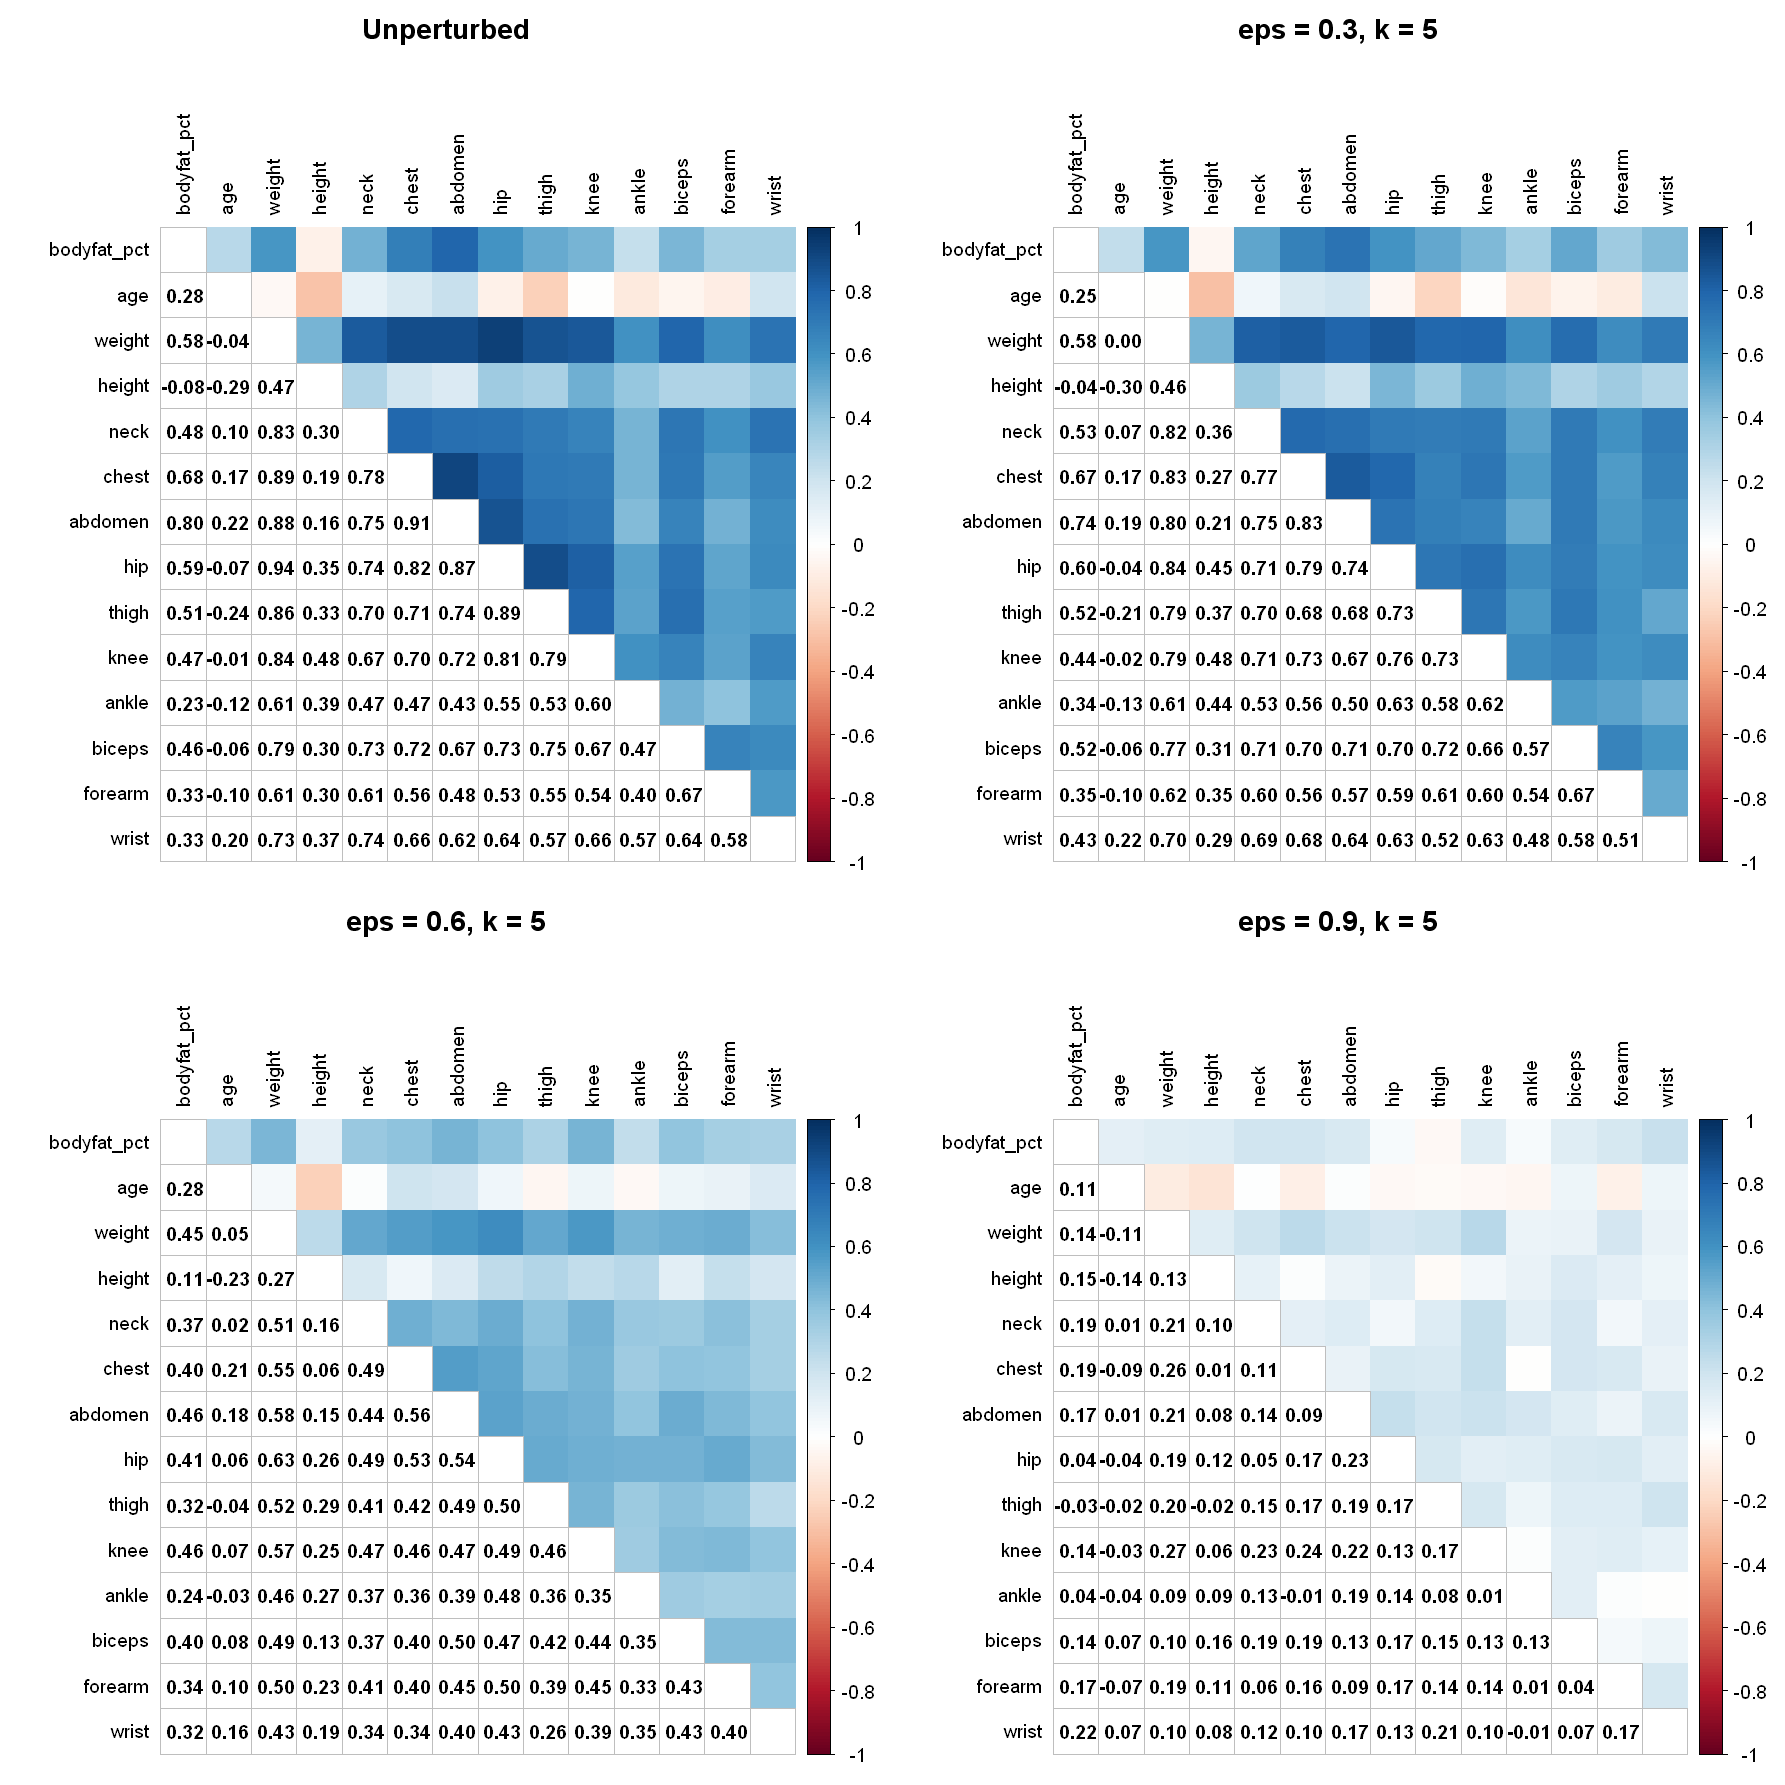

In [7]:
par(mfrow = c(2,2))
options(repr.plot.width=10.5, repr.plot.height=10.5, repr.plot.res = 170)

corrplot.mixed(cor(bf_clean), upper = 'color', lower = 'number',
               title = 'Unperturbed', mar = c(0, 0, 2, 0),
               lower.col = 'black', number.cex = .8, 
               tl.pos = 'lt', tl.cex = .8, tl.col = 'black')

corrplot.mixed(cor(bf_pert_eps0.3_k5$zperturb), upper = 'color', lower = 'number',
               title = 'eps = 0.3, k = 5', mar = c(0, 0, 2, 0),
               lower.col = 'black', number.cex = .8, 
               tl.pos = 'lt', tl.cex = .8, tl.col = 'black')

corrplot.mixed(cor(bf_pert_eps0.6_k5$zperturb), upper = 'color', lower = 'number',
               title = 'eps = 0.6, k = 5', mar = c(0, 0, 2, 0),
               lower.col = 'black', number.cex = .8, 
               tl.pos = 'lt', tl.cex = .8, tl.col = 'black')

corrplot.mixed(cor(bf_pert_eps0.9_k5$zperturb), upper = 'color', lower = 'number',
               title = 'eps = 0.9, k = 5', mar = c(0, 0, 2, 0),
               lower.col = 'black', number.cex = .8, 
               tl.pos = 'lt', tl.cex = .8, tl.col = 'black')

### Principal Component Analysis

In [8]:
pca_orig <- prcomp(bf_clean, center = TRUE, scale. = TRUE)

for(i in 1:length(eps_vec_full)){
   assign(paste0("pca_pert_eps", eps_vec_full[i], "_k5"), 
          prcomp(e(parse(text = paste0("bf_pert_eps", eps_vec_full[i], "_k5$zperturb"))), center = TRUE, scale. = TRUE))    
}

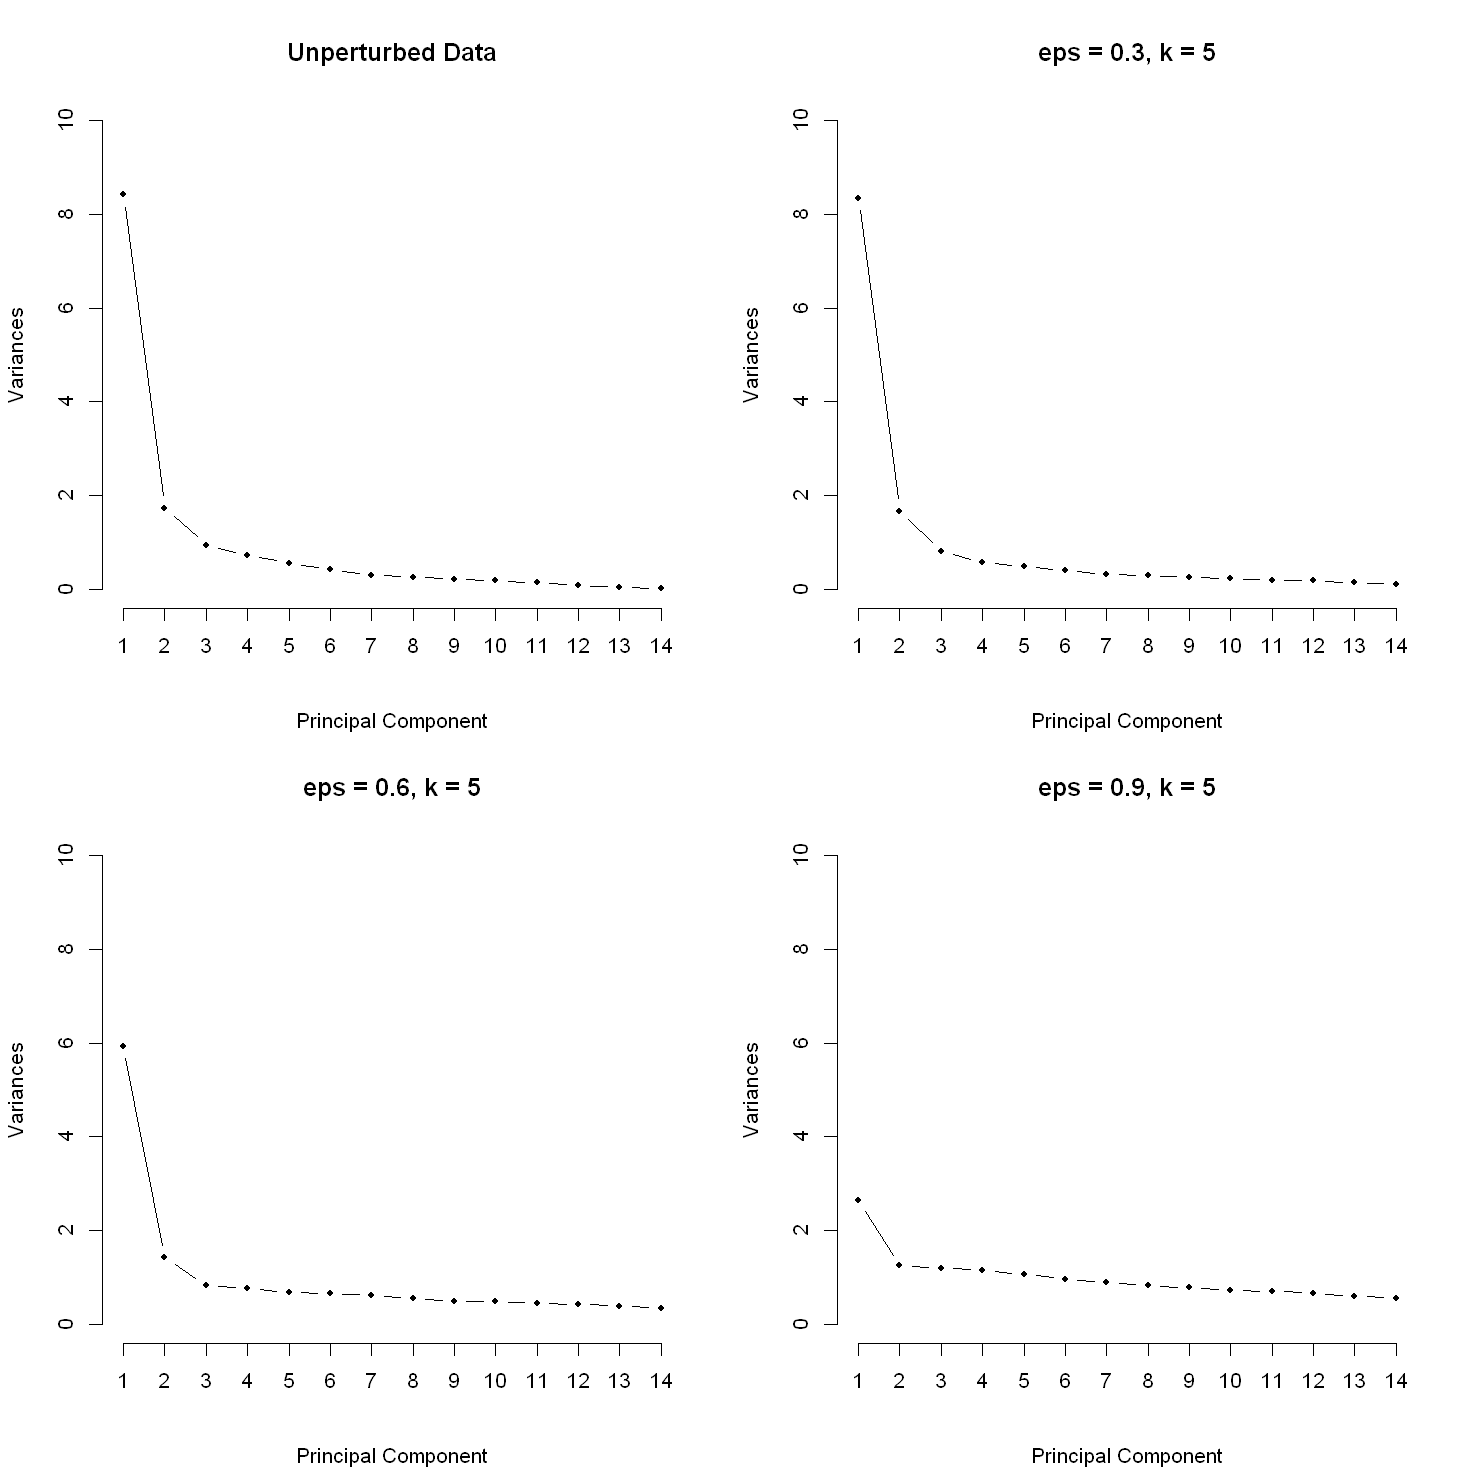

In [9]:
par(mfrow = c(2,2))
options(repr.plot.width=9.8, repr.plot.height=9.8, repr.plot.res = 150)

screeplot(pca_orig, 
          npcs = length(pca_orig$sdev),
          type = "lines",
          main = "Unperturbed Data",
          sub = "Principal Component",
          pch = 20,
          ylim = c(0,10))

screeplot(pca_pert_eps0.3_k5, 
          npcs = length(pca_orig$sdev),
          type = "lines",
          main = "eps = 0.3, k = 5",
          sub = "Principal Component",
          pch = 20,
          ylim = c(0,10))

screeplot(pca_pert_eps0.6_k5, 
          npcs = length(pca_orig$sdev),
          type = "lines",
          main = "eps = 0.6, k = 5",
          sub = "Principal Component",
          pch = 20,
          ylim = c(0,10))

screeplot(pca_pert_eps0.9_k5, 
          npcs = length(pca_orig$sdev),
          type = "lines",
          main = "eps = 0.9, k = 5",
          sub = "Principal Component",
          pch = 20,
          ylim = c(0,10))

In [10]:
pc1_prop_vec <- vector(mode = "numeric", length = length(eps_vec_full))

for(i in 1:length(eps_vec_full)){
    pc1_prop_vec[i] <- summary(e(paste0("pca_pert_eps", eps_vec_full[i], "_k5")))$importance[2,1]
}

pc2_prop_vec <- vector(mode = "numeric", length = length(eps_vec_full))

for(i in 1:length(eps_vec_full)){
    pc2_prop_vec[i] <- summary(e(paste0("pca_pert_eps", eps_vec_full[i], "_k5")))$importance[2,2]
}

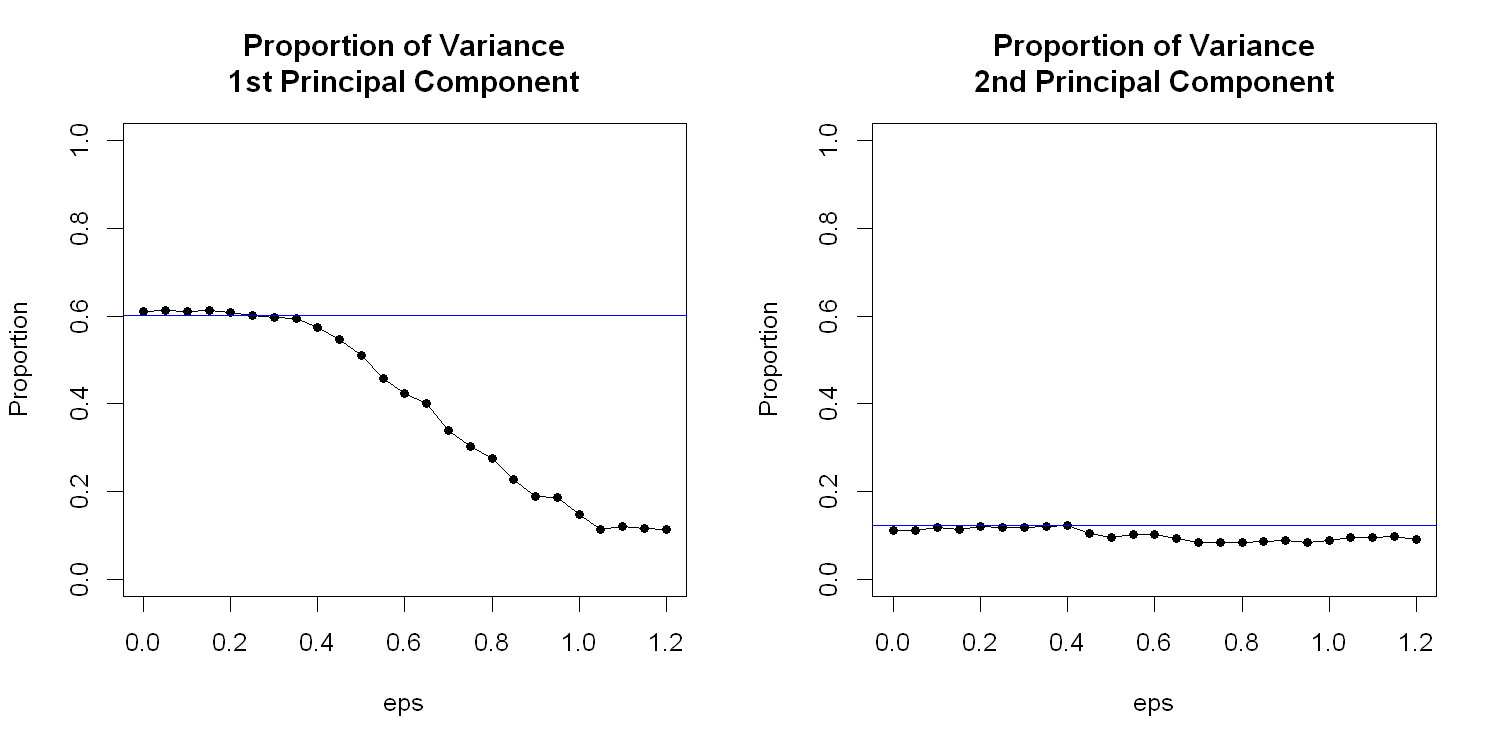

In [11]:
par(mfrow = c(1, 2))
options(repr.plot.width=10, repr.plot.height=5, repr.plot.res = 150)

plot(eps_vec_full, pc1_prop_vec,
     ylab = "Proportion", xlab = "eps", 
     xlim = c(0, 1.2), ylim = c(0, 1),
     pch = 19, cex = 0.8)
lines(eps_vec_full, pc1_prop_vec)
abline(summary(pca_orig)$importance[2,1], 0, col = "blue")
title(main = "Proportion of Variance\n1st Principal Component")

plot(eps_vec_full, pc2_prop_vec,
     ylab = "Proportion", xlab = "eps", 
     xlim = c(0, 1.2), ylim = c(0, 1),
     pch = 19, cex = 0.8)
lines(eps_vec_full, pc2_prop_vec)
abline(summary(pca_orig)$importance[2,2], 0, col = "blue")
title(main = "Proportion of Variance\n2nd Principal Component")

### Outliers: Cook's Distance

In [12]:
# Calculating Cook's distances
bf_reg <- function(data){
    regdata <- data
    regdata$bmi <- (703 * regdata$weight) / (regdata$height^2)
    regdata <- as.data.frame(scale(regdata, center = TRUE, scale = TRUE))
    #reg <- lm(bodyfat_pct ~ bmi + neck + chest + abdomen + hip - 1, data = regdata)
    reg <- lm(bodyfat_pct ~ . - 1, data = regdata)
    return(reg)
}

reg_orig <- bf_reg(bf_clean)


for(i in 1:length(eps_vec_full)) {
    assign(paste0("reg_eps", eps_vec_full[[i]], "_k5"),
           bf_reg(e(paste0("bf_pert_eps", eps_vec_full[[i]], "_k5$zperturb"))))
}

max_cooks_vec <- vector(mode = "numeric", length = length(eps_vec_full))
for(i in 1:length(eps_vec_full)){
    max_cooks_vec[i] <- max(cooks.distance(e(paste0("reg_eps", eps_vec_full[i], "_k5"))))
}

max_cooks_idx_orig <- which.max(cooks.distance(reg_orig))

max_cooks_idxs_vec <- vector(mode = "numeric", length = length(eps_vec_full))
for(i in 1:length(eps_vec_full)){
    max_cooks_idxs_vec[i] <- which.max(cooks.distance(e(paste0("reg_eps", eps_vec_full[i], "_k5"))))
}

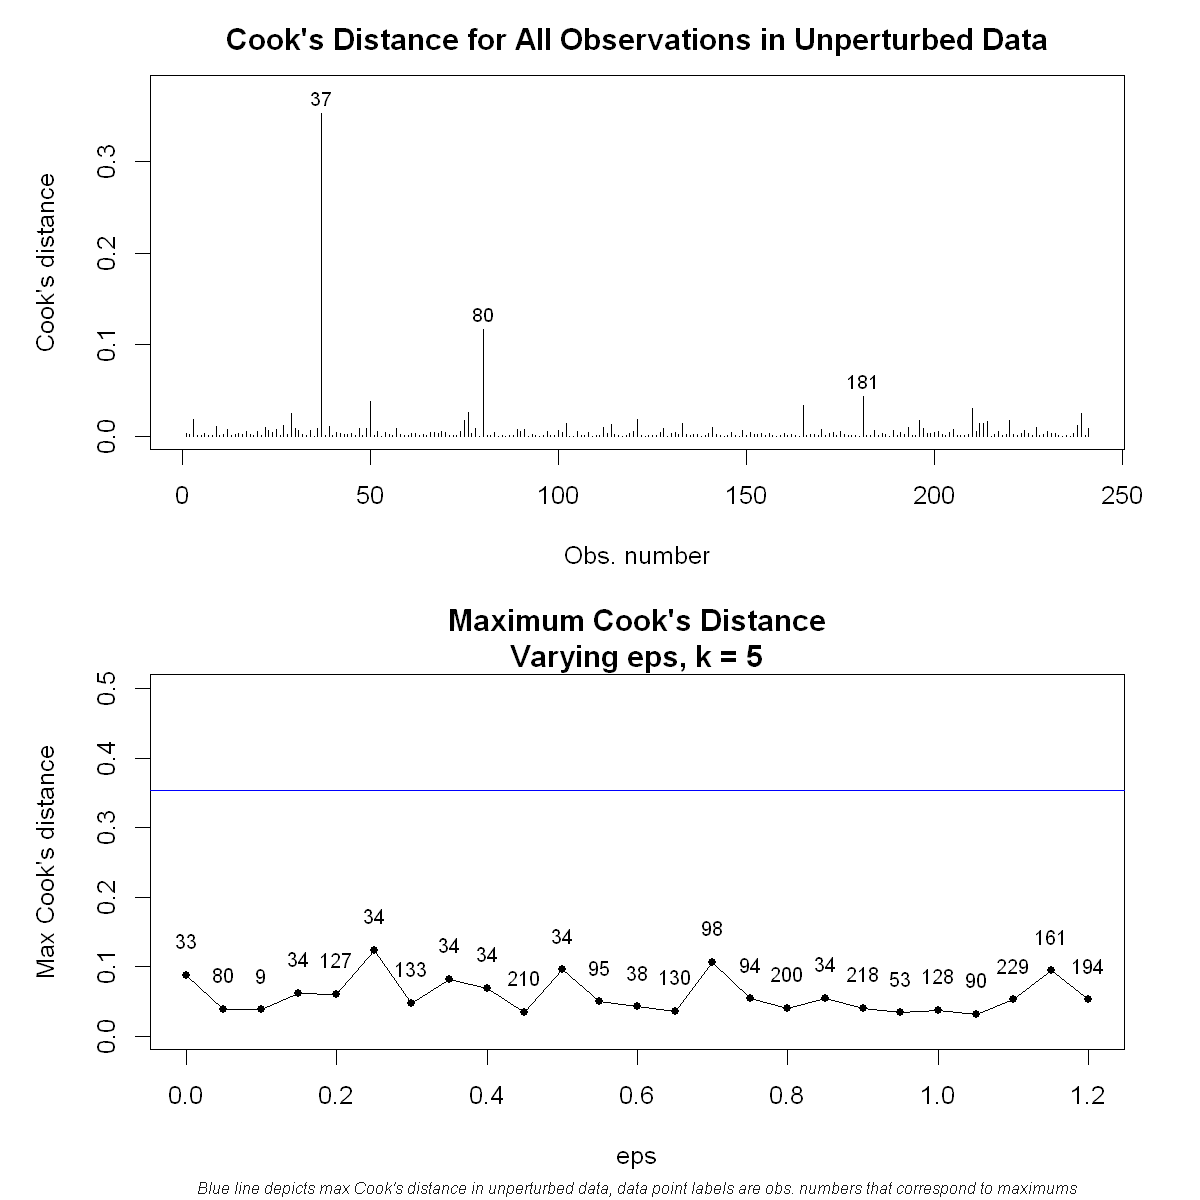

In [13]:
# Plotting Cook's distances
par(mfrow = c(2, 1), mai = c(1, 1, 0.5, 0.5))
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 150)

plot(reg_orig, which = 4, 
     caption = "", main = "Cook's Distance for All Observations in Unperturbed Data")

plot(eps_vec_full, max_cooks_vec, 
     xlab = "eps", ylab = "Max Cook's distance",
     xlim = c(0, 1.2), ylim = c(0, 0.5), pch = 20)
lines(eps_vec_full, max_cooks_vec)
abline(a = max(cooks.distance(reg_orig)), b = 0, col = "blue")
title("Maximum Cook's Distance
Varying eps, k = 5", 
      sub = "Blue line depicts max Cook's distance in unperturbed data, data point labels are obs. numbers that correspond to maximums",
      cex.sub = 0.65,
      font.sub = 3,
      col.sub = 'gray10')
text(x = eps_vec_full, y = max_cooks_vec + 0.05, labels = max_cooks_idxs_vec, cex = 0.8)

par(mfrow = c(1,1))

In [14]:
# Investigating observation 37
bf_outlier <- bf_clean
bf_outlier$bmi <- (703 * bf_outlier$weight) / (bf_outlier$height^2)
bf_outlier <- cbind(bf_outlier, pc1_score = pca_orig$x[,1])
bf_outlier <- cbind(bf_outlier, pc2_score = pca_orig$x[,2])

In [15]:
# Table of 5 individuals with highest body mass index
head(bf_outlier[order(bf_outlier[,"bmi"], decreasing = TRUE),], n = 5)

,bodyfat_pct,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist,bmi,pc1_score,pc2_score
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
37,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,48.90640,15.394387,-0.39428979
39,34.5,45,262.75,68.75,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4,39.07983,8.208097,-1.36971872
205,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,37.58716,3.743064,-4.08071817
231,35.0,65,224.50,68.25,38.8,119.6,118.0,114.3,61.3,42.1,23.4,34.9,30.1,19.4,33.88179,4.338214,-2.80688850
168,29.9,37,241.25,71.50,42.1,119.2,110.3,113.9,69.8,42.6,24.8,34.4,29.5,18.4,33.17497,5.045573,-0.07162615


In [16]:
# Observation 37 has the highest PC1 score and the highest value in most variables in the original data
summary(bf_outlier)

  bodyfat_pct         age            weight          height     
 Min.   : 4.00   Min.   :22.00   Min.   :125.0   Min.   :64.00  
 1st Qu.:13.10   1st Qu.:37.00   1st Qu.:160.2   1st Qu.:68.50  
 Median :19.50   Median :44.00   Median :177.0   Median :70.25  
 Mean   :19.51   Mean   :45.12   Mean   :179.7   Mean   :70.36  
 3rd Qu.:25.30   3rd Qu.:54.00   3rd Qu.:197.0   3rd Qu.:72.25  
 Max.   :47.50   Max.   :81.00   Max.   :363.1   Max.   :77.50  
      neck           chest          abdomen            hip       
 Min.   :31.10   Min.   : 83.4   Min.   : 70.40   Min.   : 85.3  
 1st Qu.:36.40   1st Qu.: 95.4   1st Qu.: 86.00   1st Qu.: 95.8  
 Median :38.00   Median : 99.8   Median : 91.50   Median : 99.3  
 Mean   :38.05   Mean   :101.1   Mean   : 92.89   Mean   :100.1  
 3rd Qu.:39.50   3rd Qu.:105.3   3rd Qu.: 99.70   3rd Qu.:103.5  
 Max.   :51.20   Max.   :136.2   Max.   :148.10   Max.   :147.7  
     thigh            knee           ankle           biceps         forearm    
 Mi

In [17]:
# Observation 37 has the highest or lowest PC1 value for all but two perturbed datasets
find_rank <- function(data, idx){
    ranks_vec <- order(data, decreasing = TRUE)
    rank <- which(ranks_vec == idx)
    return(rank)
}

max_pc1_idx_orig <- which.max(pca_orig$x[,1])

max_pc1_idxs_vec <- vector(mode = "numeric", length = length(eps_vec_full))
for(i in 1:length(eps_vec_full)){
    # Find rank of observation 37 in PC1 scores
    max_pc1_idxs_vec[i] <- find_rank(e(paste0("pca_pert_eps", eps_vec_full[i], "_k5$x[,1]")), 
                                     max_pc1_idx_orig)
}

max_pc1_idxs_vec

[1]   7   1   1   1   1   1   1   1   1   3   1   1   1 241   1   1 241 241 241
[20]   1 241 241   1   1   1

In [18]:
# Observation 37 has only 5 neighborhoods (the values of k) for all values of eps
bf_pert_eps1.2_k5$nNhbrs[max_pc1_idx_orig]

[1] 5

### Outliers: PCA Plots

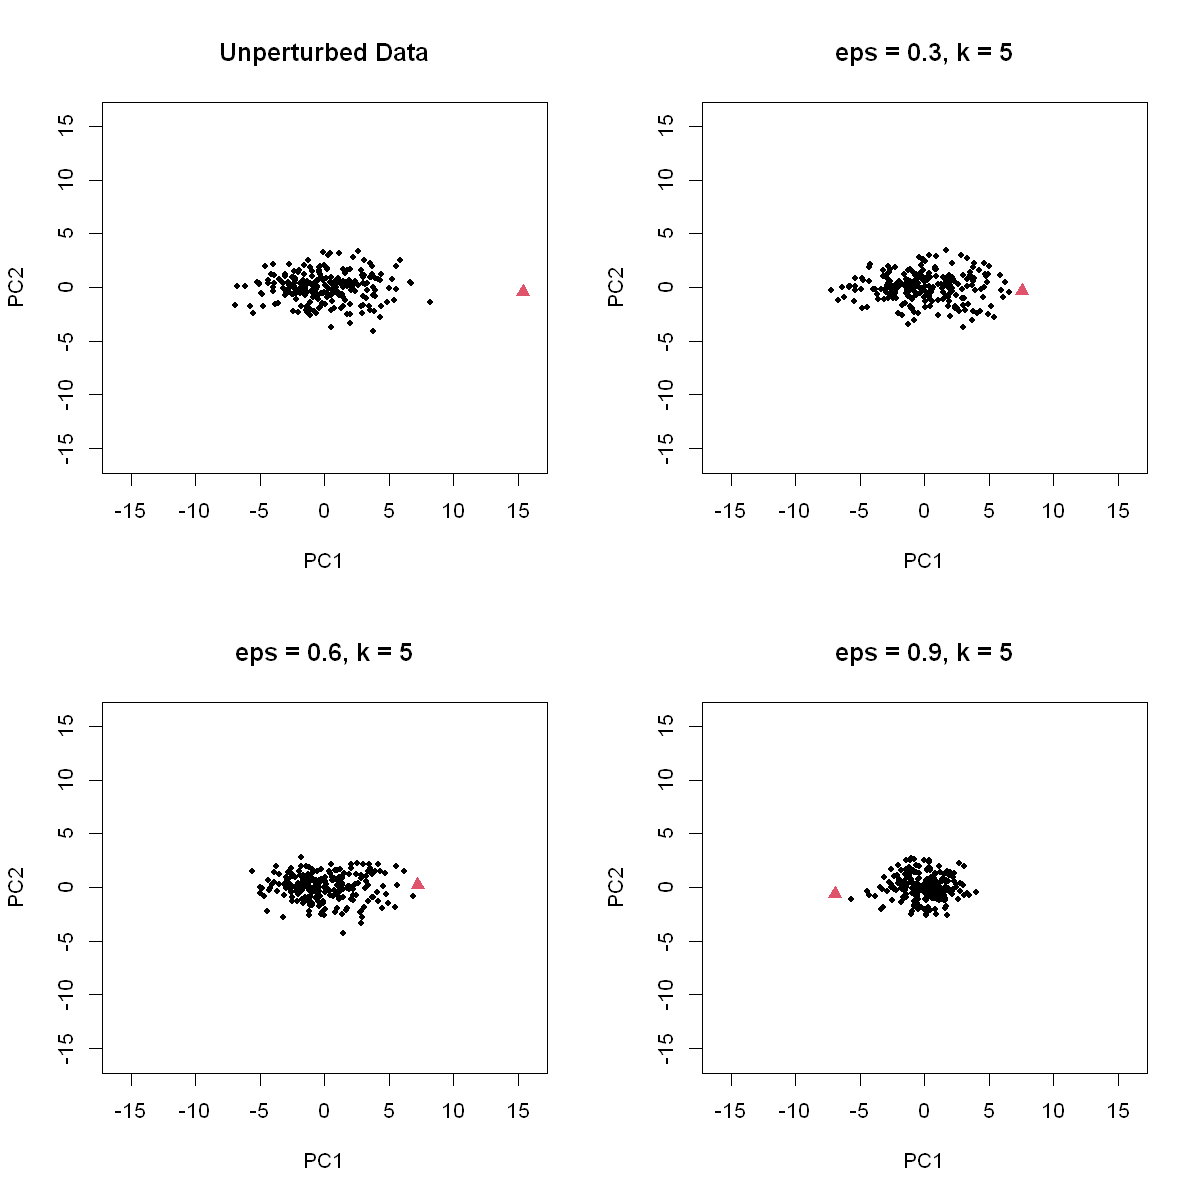

In [19]:
par(mfrow = c(2,2))
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 150)

plot(pca_orig$x[,1], pca_orig$x[,2],
     main = "Unperturbed Data",
     xlab = "PC1", ylab = "PC2",
     xlim = c(-16, 16), ylim = c(-16,16), 
     col = 1, pch = 20)
points(pca_orig$x[max_pc1_idx_orig,1], pca_orig$x[max_pc1_idx_orig,2],
      col = 2, pch = 17, cex = 1.2)

plot(pca_pert_eps0.3_k5$x[,1], pca_pert_eps0.3_k5$x[,2],
     main = "eps = 0.3, k = 5",
     xlab = "PC1", ylab = "PC2",
     xlim = c(-16, 16), ylim = c(-16,16), 
     col = 1, pch = 20)
points(pca_pert_eps0.3_k5$x[max_pc1_idx_orig,1], pca_pert_eps0.3_k5$x[max_pc1_idx_orig,2],
      col = 2, pch = 17, cex = 1.2)

plot(pca_pert_eps0.6_k5$x[,1], pca_pert_eps0.6_k5$x[,2],
     main = "eps = 0.6, k = 5",
     xlab = "PC1", ylab = "PC2",
     xlim = c(-16, 16), ylim = c(-16,16), 
     col = 1, pch = 20)
points(pca_pert_eps0.6_k5$x[max_pc1_idx_orig,1], pca_pert_eps0.6_k5$x[max_pc1_idx_orig,2],
      col = 2, pch = 17, cex = 1.2)

plot(pca_pert_eps0.9_k5$x[,1], pca_pert_eps0.9_k5$x[,2],
     main = "eps = 0.9, k = 5",
     xlab = "PC1", ylab = "PC2",
     xlim = c(-16, 16), ylim = c(-16,16), 
     col = 1, pch = 20)
points(pca_pert_eps0.9_k5$x[max_pc1_idx_orig,1], pca_pert_eps0.9_k5$x[max_pc1_idx_orig,2],
      col = 2, pch = 17, cex = 1.2)

### Inlier

**Note:** The analyses in this section are not included in the RWN paper

There is one 81 year-old man in the data whose body measurements are typical but stands out in terms of age.

In [20]:
head(bf_outlier[order(bf_outlier[,"age"], decreasing = TRUE),], n = 5)

,bodyfat_pct,age,weight,height,neck,chest,abdomen,hip,thigh,knee,ankle,biceps,forearm,wrist,bmi,pc1_score,pc2_score
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
73,21.5,81,161.25,70.25,37.8,96.4,95.4,99.3,53.5,37.5,21.5,31.4,26.8,18.3,22.97007,-1.333129,-2.330008
241,31.9,74,207.50,70.00,40.8,112.4,108.5,107.1,59.3,42.2,24.6,33.7,30.0,20.9,29.76990,3.875892,-2.260071
79,27.0,72,168.00,69.25,38.5,101.4,99.8,96.2,56.3,36.6,22.0,29.7,26.3,18.0,24.62777,-1.094089,-2.615278
81,14.9,72,157.75,67.25,37.7,97.5,88.1,96.9,57.2,37.7,21.8,32.6,28.0,18.8,24.52111,-1.330045,-1.757145
238,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1,29.04444,2.886300,-2.460294


In [21]:
# PC2 is most correlated with age
as.vector(cor(pca_orig$x, bf_clean$age))

[1]  0.018966340 -0.777369651 -0.568272311 -0.090360421 -0.070480478
 [6]  0.027108620  0.167962990  0.059290811 -0.109683897 -0.014381941
[11] -0.116180170  0.028914365  0.014837225  0.004186054

In [22]:
# The oldest man in the dataset does not have an outlying PC2 score
max_age_idx_orig <- which.max(bf_clean$age)

max_age_idxs_vec <- vector(mode = "numeric", length = length(eps_vec_full))
for(i in 1:length(eps_vec_full)){
    # Find rank of age "inlier" in PC2 scores
    max_age_idxs_vec[i] <- find_rank(e(paste0("pca_pert_eps", eps_vec_full[i], "_k5$x[,2]")), 
                                     max_age_idx_orig)
}

summary(bf_outlier$pc2_score)
    # compare with table of 5 oldest individuals above

find_rank(pca_orig$x[,2], max_age_idx_orig)
    # the 81 year old man does not have an extreme PC2 score in the original data

max_age_idxs_vec
    # the 81 year old man does has a bottom 3 rank (rank 239, 240, or 241) in three of the perturbed datasets 

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-4.08072 -0.68303  0.06485  0.00000  0.68870  3.36541 

[1] 231

[1] 240 233 239 226 216 229 220 213 226 232  12  31 190 200 189 213  96 146 101
[20] 158 241 179 111  25  25

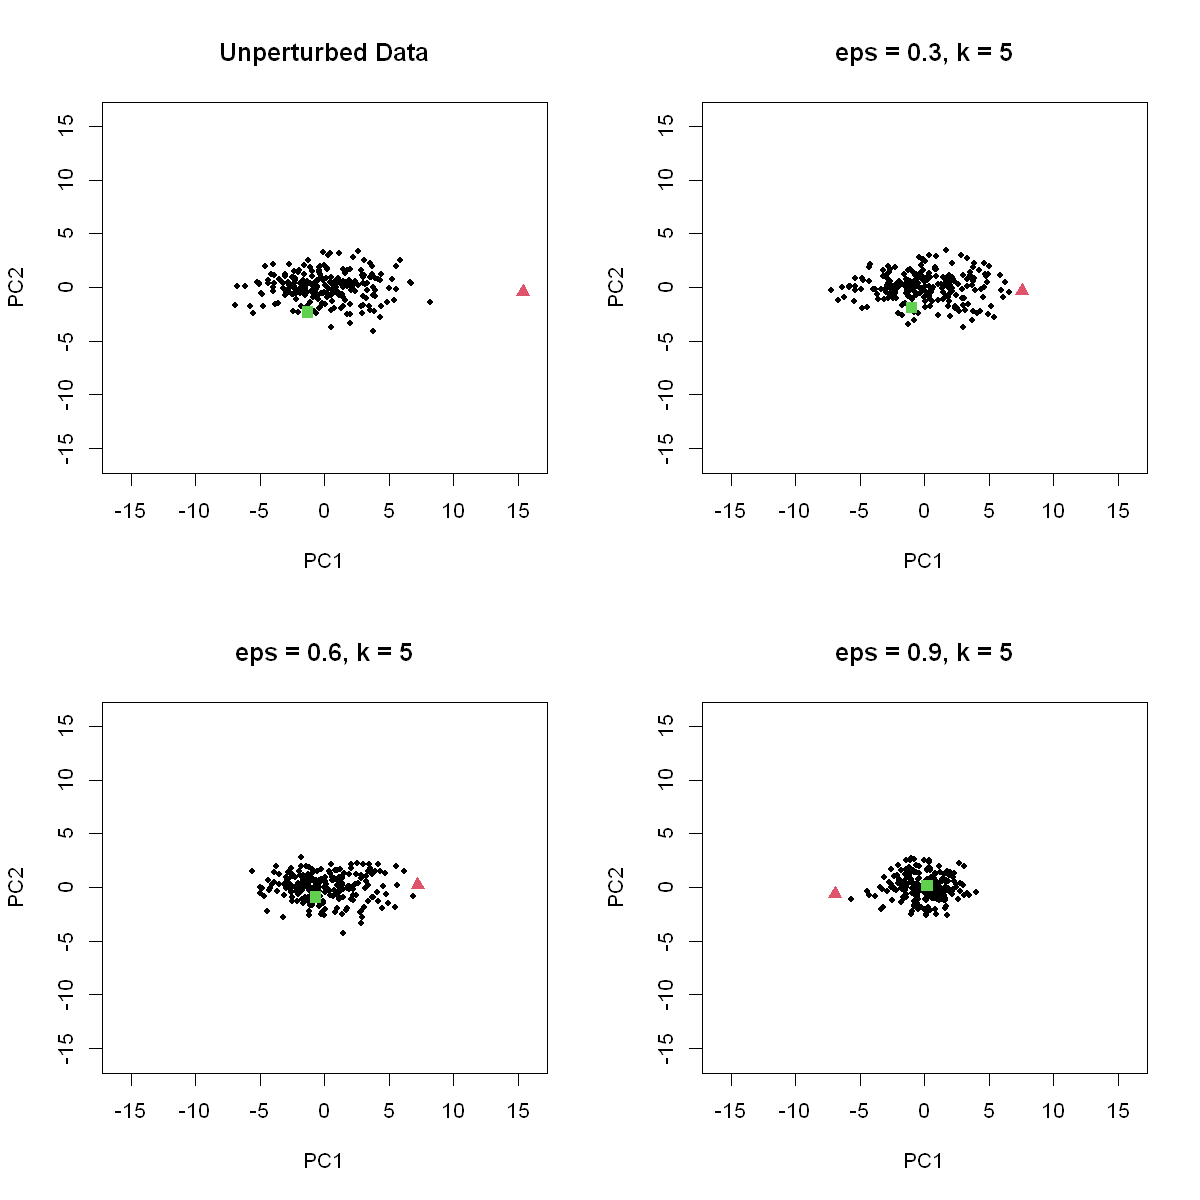

In [23]:
# PCA plots with green square for 81 year old man
par(mfrow = c(2,2))
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res = 150)

plot(pca_orig$x[,1], pca_orig$x[,2],
     main = "Unperturbed Data",
     xlab = "PC1", ylab = "PC2",
     xlim = c(-16, 16), ylim = c(-16,16), 
     col = 1, pch = 20)
points(pca_orig$x[max_pc1_idx_orig,1], pca_orig$x[max_pc1_idx_orig,2],
      col = 2, pch = 17, cex = 1.2)
points(pca_orig$x[max_age_idx_orig,1], pca_orig$x[max_age_idx_orig,2],
      col = 3, pch = 15, cex = 1.2)

plot(pca_pert_eps0.3_k5$x[,1], pca_pert_eps0.3_k5$x[,2],
     main = "eps = 0.3, k = 5",
     xlab = "PC1", ylab = "PC2",
     xlim = c(-16, 16), ylim = c(-16,16), 
     col = 1, pch = 20)
points(pca_pert_eps0.3_k5$x[max_pc1_idx_orig,1], pca_pert_eps0.3_k5$x[max_pc1_idx_orig,2],
      col = 2, pch = 17, cex = 1.2)
points(pca_pert_eps0.3_k5$x[max_age_idx_orig,1], pca_pert_eps0.3_k5$x[max_age_idx_orig,2],
      col = 3, pch = 15, cex = 1.2)

plot(pca_pert_eps0.6_k5$x[,1], pca_pert_eps0.6_k5$x[,2],
     main = "eps = 0.6, k = 5",
     xlab = "PC1", ylab = "PC2",
     xlim = c(-16, 16), ylim = c(-16,16), 
     col = 1, pch = 20)
points(pca_pert_eps0.6_k5$x[max_pc1_idx_orig,1], pca_pert_eps0.6_k5$x[max_pc1_idx_orig,2],
      col = 2, pch = 17, cex = 1.2)
points(pca_pert_eps0.6_k5$x[max_age_idx_orig,1], pca_pert_eps0.6_k5$x[max_age_idx_orig,2],
      col = 3, pch = 15, cex = 1.2)


plot(pca_pert_eps0.9_k5$x[,1], pca_pert_eps0.9_k5$x[,2],
     main = "eps = 0.9, k = 5",
     xlab = "PC1", ylab = "PC2",
     xlim = c(-16, 16), ylim = c(-16,16), 
     col = 1, pch = 20)
points(pca_pert_eps0.9_k5$x[max_pc1_idx_orig,1], pca_pert_eps0.9_k5$x[max_pc1_idx_orig,2],
      col = 2, pch = 17, cex = 1.2)
points(pca_pert_eps0.9_k5$x[max_age_idx_orig,1], pca_pert_eps0.9_k5$x[max_age_idx_orig,2],
      col = 3, pch = 15, cex = 1.2)

In [24]:
# The protection provided to this individual can change for each perturbed dataset generated using RWN
count_value <- function(variable, value){
    value_rows <- variable
    value_rows <- value_rows[value_rows == value]
    length(value_rows)
}

age81_cnt_vec <- vector(mode = "numeric", length = length(eps_vec_full))
for(i in 1:length(eps_vec_full)){
    age81_cnt_vec[i] <- count_value(e(paste0("bf_pert_eps", eps_vec_full[i], "_k5$zperturb$age")), 81)
}

age81_cnt_vec
table(age81_cnt_vec)
# Most of the time, the value 81 disappears from the data
# There are 3 datasets where 81 appears with the same frequency as in the original dataset (1 time)
# There are 2 datasets where 81 appears more frequently than in the original dataset (2 or 3 times)

[1] 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 2 0 2 0 0 0 1 2 1 0

age81_cnt_vec
 0  1  2 
17  5  3 

In [25]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19045)

Matrix products: default

locale:
[1] LC_COLLATE=English_United States.1252 
[2] LC_CTYPE=English_United States.1252   
[3] LC_MONETARY=English_United States.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_United States.1252    

attached base packages:
[1] parallel  stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] mfp_1.5.4      survival_3.5-5 pdist_1.2.1    regtools_1.7.0 FNN_1.1.3.2   
[6] gtools_3.9.4   corrplot_0.92 

loaded via a namespace (and not attached):
 [1] Rcpp_1.0.10         pillar_1.9.0        compiler_4.1.3     
 [4] base64enc_0.1-3     iterators_1.0.14    tools_4.1.3        
 [7] digest_0.6.31       uuid_1.1-0          jsonlite_1.8.4     
[10] evaluate_0.21       lifecycle_1.0.3     lattice_0.21-8     
[13] rlang_1.1.0         Matrix_1.5-4        foreach_1.5.2      
[16] mlapi_0.1